In [1]:
import numpy as np
import pandas as pd

# SVMs

## Digit Recognition

In [2]:
from sklearn import datasets, svm, metrics

In [3]:
digit = datasets.load_digits()
df = pd.DataFrame(digit.data)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
target = digit.target

In [6]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
% matplotlib inline
from matplotlib import pyplot as plt
from sklearn import cross_validation

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


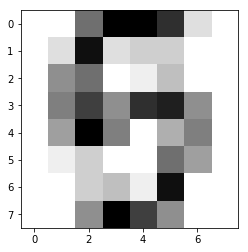

In [8]:
plt.imshow(digit.images[590], cmap = plt.cm.gray_r, interpolation = 'nearest')

In [9]:
clf = svm.SVC(kernel = 'linear', C = 5)
X_Train, X_Test, Y_Train, Y_Test = cross_validation.train_test_split(df, target, test_size = 0.2)

In [10]:
clf.fit(X_Train, Y_Train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
clf.score(X_Test, Y_Test)

0.98333333333333328

In [12]:
from sklearn.metrics import classification_report as cr
y_pred = clf.predict(X_Test)
print (cr(Y_Test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        31
          1       0.97      1.00      0.98        28
          2       1.00      1.00      1.00        44
          3       1.00      0.98      0.99        42
          4       1.00      1.00      1.00        37
          5       0.93      0.96      0.95        27
          6       1.00      1.00      1.00        39
          7       0.97      1.00      0.98        31
          8       0.97      0.95      0.96        37
          9       0.98      0.95      0.97        44

avg / total       0.98      0.98      0.98       360



In [13]:
from sklearn.metrics import confusion_matrix as cm

In [14]:
print (cm(Y_Test, y_pred))

[[31  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  1  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  1]
 [ 0  0  0  0  0  0 39  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  1  0  0  0  1  0  0 35  0]
 [ 0  0  0  0  0  0  0  1  1 42]]


#### Gaussian Kernel

In [15]:
clf = svm.SVC(kernel = 'rbf', C = 5, gamma = 0.0005)

In [16]:
clf.fit(X_Train, Y_Train)
clf.score(X_Test, Y_Test)

0.9916666666666667

In [17]:
y_pred = clf.predict(X_Test)
print (cm(Y_Test, y_pred))

[[31  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  1]
 [ 0  0  0  0  0  0 39  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  0  0  1  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0  1  0 43]]


### Finding problematic number

In [18]:
X_Test['target'] = Y_Test
X_Test['pred'] = y_pred
prob = X_Test[(X_Test['target'] == 8) & (X_Test['pred'] == 1)]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
prob

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,target,pred


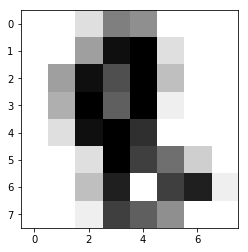

In [20]:
plt.imshow(digit.images[905], cmap = plt.cm.gray_r, interpolation = 'nearest')

## Applying PCA

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
sc = StandardScaler()
pca = decomposition.PCA()
x_std = sc.fit_transform(df)
pca.fit(x_std)
v = pca.explained_variance_
total = v.sum()
i = 0
summ = 0
while i<v.shape[0]:
    summ = summ + v[i]
    if summ/total > 0.95:#for 0.95 score
        break
    i = i+1
print(summ)
print (total)
print (i)
summ/total

57.9975258629
61.0
39


0.95077911250664626

In [28]:
pca.n_components = i
x_pca = pca.fit_transform(x_std)
x_pca.shape
import time
start = time.time()
svc = svm.SVC()
X_Train, X_Test, Y_Train, Y_Test = cross_validation.train_test_split(x_pca, target, test_size = 0.2)
svc.fit(X_Train, Y_Train)
print(svc.score(X_Test, Y_Test))
end = time.time()
end-start

0.969444444444


0.09425044059753418

## Glass Dataset

In [176]:
df1 = pd.read_csv('glass.csv')

In [65]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [66]:
df1.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [67]:
target1 = df1.Type

In [68]:
del df1['Type']

In [73]:
clf = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.0005)

In [155]:
X_Train, X_Test, Y_Train, Y_Test = cross_validation.train_test_split(df1, target1, test_size = 0.2)

In [163]:
clf = svm.SVC(kernel = 'rbf', C = 14, gamma = 1)
clf.fit(X_Train, Y_Train)
clf.score(X_Test, Y_Test)

0.90697674418604646

In [164]:
lst = []
for i in np.arange (0.1, 2000, 0.1):
    clf = svm.SVC(kernel = 'rbf', C = i, gamma = 1)
    clf.fit(X_Train, Y_Train)
    lst.append(clf.score(X_Test, Y_Test))

In [166]:
lst.index(max(lst))

0.90697674418604646

In [131]:
import seaborn as sns
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


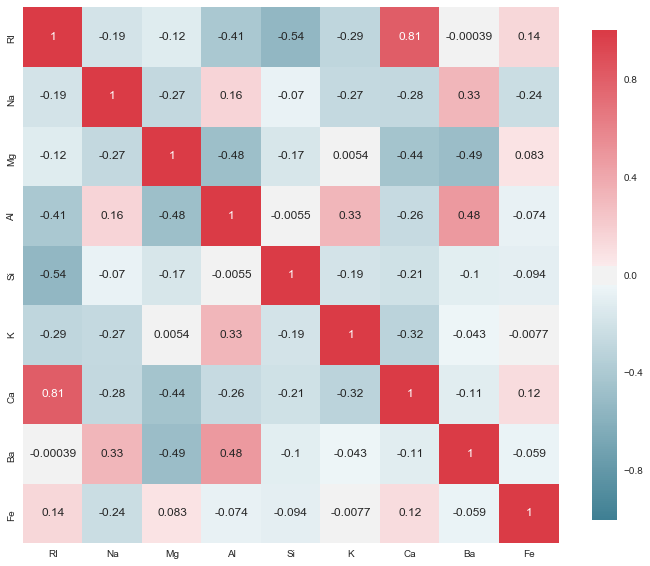

In [133]:
plot_correlation_map(df1)
df1.corr()

In [136]:
from sklearn.feature_selection import RFE

#### Removing some columns

In [177]:
del df1['Ba']

In [178]:
X_Train, X_Test, Y_Train, Y_Test = cross_validation.train_test_split(df1, target1, test_size = 0.2)

In [179]:
clf = svm.SVC(kernel = 'rbf', C = 14, gamma = 1)
clf.fit(X_Train, Y_Train)
clf.score(X_Test, Y_Test)

0.93023255813953487

In [180]:
lst = []
for i in np.arange (0.1, 2000, 0.1):
    clf = svm.SVC(kernel = 'rbf', C = i, gamma = 1)
    clf.fit(X_Train, Y_Train)
    lst.append(clf.score(X_Test, Y_Test))

In [181]:
max(lst)

0.93023255813953487